# Zusammenhang zwischen wahrgenommener Bildqualität nach Bildkompression und Dateigröße bewertet mit Maximum Likelihood Difference Scaling (MLDS)

## Marcus Bindermann, Johann Pönitz, Tobias Urban

### Seminar: Visuelle Wahrnehmung beim Menschen und Bildqualität – WiSe 2020/21

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('ticks')
sns.set_context('talk')

## 1. Einleitung

Bilder werden für die Übertragung im Internet häufig komprimiert, um die Dateigröße zu verringern und damit die zu übertragende Datenmenge zu reduzieren. Eines der verbreitetsten Dateiformate für die Bildkompression ist das JPEG-Format. Bei einer solchen Bildkompression handelt es sich um eine verlustbehaftete Bildkomprimierung, das heißt Bildinformationen gehen objektiv verloren.

Das nachfolgende Experiment untersucht, wie sich die wahrgenommene Bildqualität beim Komprimieren verändert. Diese wahrgenommene Bildqualität wird in Relation zur Dateigröße betrachtet. Um die Veränderung der wahrgenommenen Bildqualität zu untersuchen, verwenden wir die MLDS-Methode auf der Grundlage von Triaden-Vergleichen, wie von Charrier et al. beschrieben [[1]](#referenzen).

Unsere Untersuchungshypothese ist, dass sich die wahrgenommene Bildqualität proportional zur Dateigröße verändert und somit mit steigender Dateigröße in gleichem oder ähnlichem Maß ansteigt.

## 2. Experimentelles Design

Als Ausgangsdaten für unsere Untersuchung verwendeten wir Bilder aus der Colourlab Image Database:Image Quality (CID:IQ) des Norwegian Colour and Visual Computing Laboratory der Norwegian University of Science and Technology [[2]](#referenzen). Wir entschieden uns für diesen Bilddatensatz, da die Bilder für Forschungszwecke verwendet werden dürfen und im unkomprimierten BMP-Format zur Verfügung gestellt werden.

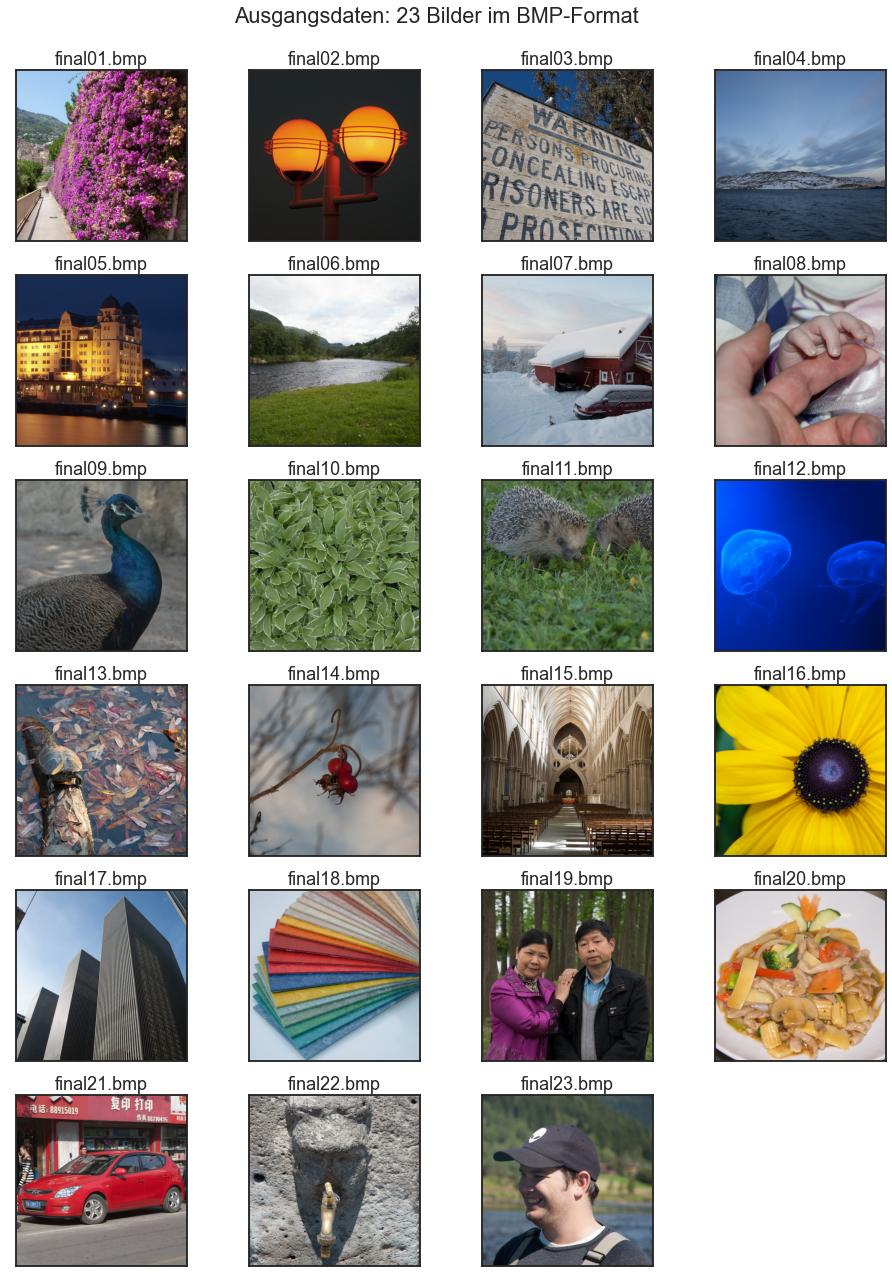

In [13]:
print_images()

Für die Komprimierung der Bilder nutzten wir die Python Image Library (PIL) mit der Funktion save(), die beim Aufruf als Argumente das Zielformat (JPEG) sowie einen ganzzahligen quality-Parameter zwischen 0 (größte Kompression, geringste Dateigröße) und 95 (geringste Kompression, größte Dateigröße) übergeben bekommt. Von der Verwendung von quality-Parametern größer als 95 wird in der PIL-Dokumentation abgeraten, weshalb wir diese Werte nicht weiter betrachten [[3]](#referenzen).

Wir komprimieren zunächst alle 23 Ausgangsbilder und speichern für jedes Bild und jede Kompressionsstufe die Dateigröße des komprimierten Bildes. Diese Werte visualisieren wir in der folgenden Abbildung mit der Dateigröße nach Komprimierung absolut und relativ zur Originalgröße an den y-Achsen und den quality-Parametern (Kompressionsstufen) an der x-Achse.

In [14]:
for element in filenumbers_all:
    createImages(element,0,95,1)
    getFilesize(element,0,95,1,filesize_absolute_all,filesize_relative_all)
    deleteImages(element,0,95,1)

Für quality-Parameter von 0 bis 2 ändert sich die Dateigröße fast gar nicht. Im Bereich der quality-Parameter von 3 bis etwa 60 folgt die Veränderung der Dateigröße in etwa dem Verlauf eines Graphen einer linearen Funktion. Oberhalb des quality-Paramters von 60 steigt die Kurve, die die Dateigröße darstellt, steil an und folgt in ihrer Form dem Verlauf einer quadratischen Funktion. Wir gehen aufgrund unserer Hypothese also davon aus, dass die wahrgenommene Bildqualität in etwa dem Kurvenverlauf des Wachstums der Dateigröße mit steigendem quality-Paramter erhöht.

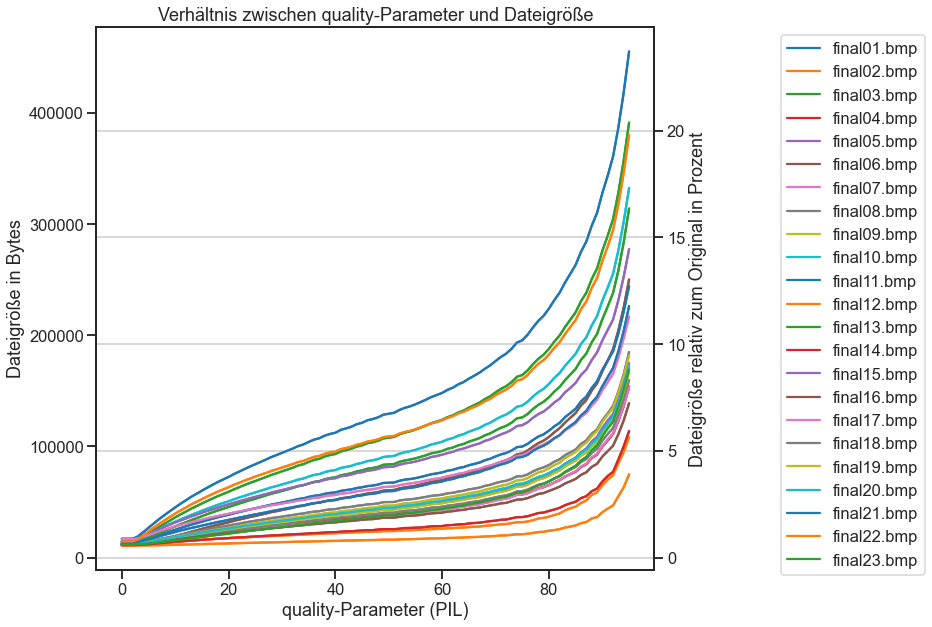

In [15]:
plotQualitySizeRatioAll()

Anders als etwa bei der Bildkomprimierung mittels Vektor-Quantifizierung wie in [[1]](#referenzen), können wir mit der save()-Methode der Python Image Library die gewünschte Dateigröße des komprimierten Bildes nicht manuell bestimmen. Um die Veränderung der wahrgenommenen Bildqualität zwischen den einzelnen Stimuli zu ermöglichen, wählen wir aus dem Datensatz insgesamt fünf Bilder mit einem ähnlichen Verhältnis zwischen steigendem quality-Parameter und Dateigröße aus.

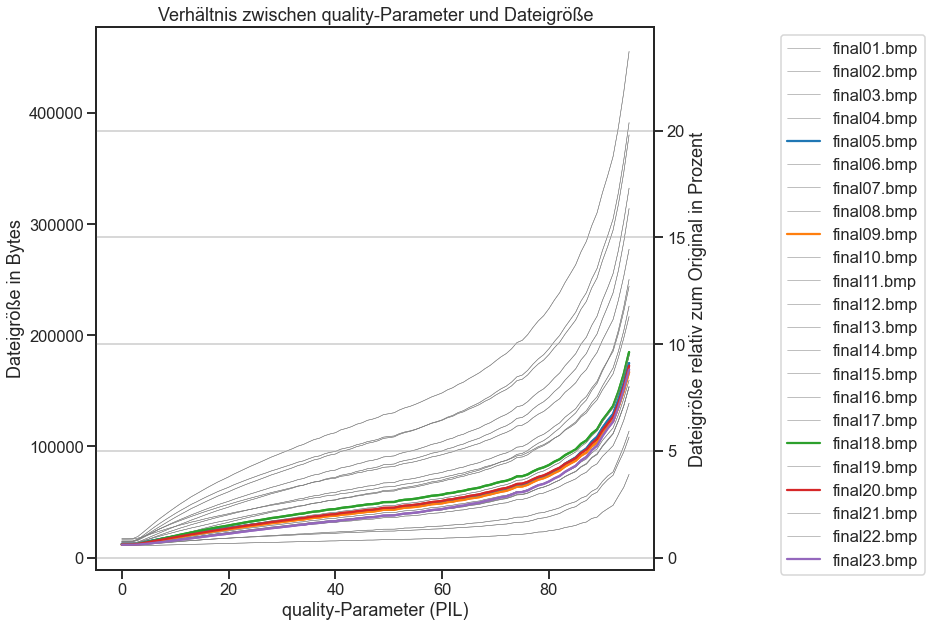

In [16]:
plotQualitySizeRatioAllFocused()

Da die Versuchspersonen die Stimuli vollständig und in 100-Prozent-Auflösung auf ihrem Bildschirm darstellen können sollten, verringerten wir die Bildgröße der Originalbilder von 800 x 800 Pixel auf 500 x 500 Pixel mittels der Python-Funktion resize(), die als Argument ein Paar bestehend aus der gewünschten Bildhöhe und Bildbreite in Pixel übergeben bekommt. Diese Ausgangsbilder für die folgenden Experimente speicherten wir wieder im BMP-Format ab, sodass bei dieser Größenanpassung noch keine Bildkompression stattfand.

In [17]:
# create array with filesize in it
filenumbers = ['05', '09', '18', '20', '23']
parameter = [0,2,4,6,10,15,20,25,65,70,75,80,85,90,95]

In [18]:
# resize images to 500 x 500 px

for element in filenumbers:
    pic = Image.open('images/originals/final{}.bmp'.format(element))
    size = (500, 500)
    out = pic.resize(size)
    out.save('images/final{}.bmp'.format(element), 'bmp')

In [19]:
createStimuli(filenumbers, parameter)

In [20]:
# original image size in 500 x 500 px = 750.054 bytes

filesize_relative = []
filesize_absolute = []
for element in filenumbers:
    filesize_absolute.append([])
    filesize_relative.append([])
    for param in parameter:
        file = 'images/final{}_quality_{}.jpg'.format(element, param)
        filesize_absolute[len(filesize_absolute)-1].append(os.stat(file).st_size)
        filesize_relative[len(filesize_relative)-1].append(os.stat(file).st_size/750054*100)

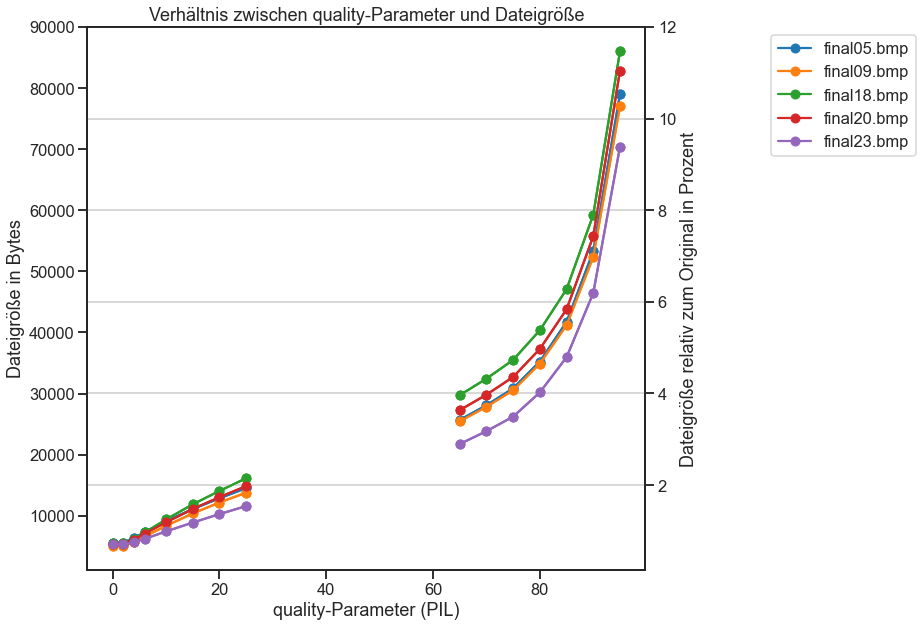

In [21]:
plotQualitySizeRatioStimuli()

Unser experimentelles Design beinhaltet Triadenvergleiche und folgt dabei dem Paper von Charrier et al. [[1]](#referenzen). Dabei erstellen wir für jedes der fünf Ausgangsbilder insgesamt 15 Stimuli mit jeweils unterschiedlichen quality-Parametern und speichern diese im JPEG-Format ab. Bei beiden Teilexperimenten sehen die Versuchspersonen nacheinander alle möglichen Kombination aus drei Stimuli, die sich im Grad ihrer Kompression unterscheiden. Dabei lautet die Aufforderung an die Versuchspersonen durch Drücken der linken oder rechten Pfeiltaste dasjenige Bilderpaar auszuwählen, welches sich stärker unterscheidet. Die Versuchspersonen haben dabei keine Zeitbegrenzung für Ihre Wahl, werden jedoch zu einer Entscheidung gezwungen. Ein Enthalten oder Nicht-Abstimmen ist nicht möglich. Bei den Versuchspersonen handelte es sich um die drei Gruppenmitglieder, die die Experimente selbstständig an ihren eigenen Computern durchführten. 

Im ersten Teil des Experimentes sehen die Versuchspersonen am Computerbildschirm nacheinander alle möglichen Kombinationen aus drei Stimuli, die mit den 8 verschiedenen quality-Parametern 0, 2, 4, 6, 10, 15, 20, 25 komprimiert wurden. Der Binomialkoeffizient von 8 und 3 ist 56, für jedes Bild sehen die Versuchspersonen also 56 verschiedene Triaden. Im zweiten Teil des Experiments ist die Aufgabenstellung für die Versuchspersonen gleich. Es werden sieben Stimuli erzeugt, also Bilder die mit den quality-Parametern 65, 70, 75, 80, 85, 90, 95 komprimiert wurden. Die Versuchspersonen sehen nacheinander alle möglichen Kombinationen von 3 Stimuli aus 7, also insgesamt 35 verschiedene.

Für jedes der fünf Bilder wurden für beide Teilexperimente (vorderer und hinterer Skalenbereich) jeweils vier Versuche durchgeführt. Der erste Versuch diente dazu, dass sich die Versuchsperson mit den Stimuli und dem Experimentdesign vertraut machen. Die Ergebnisse des ersten Versuchs wurden verworfen und nicht ausgewertet. Die Ergebnisse der folgenden drei Versuche wurden in einer CSV-Datei gespeichert und mithilfe eines R-Skriptes die von den Versuchspersonen Veränderung der wahrgenommenen Bildqualität (Difference Scale Value) berechnet.

Jede der drei getesteten Personen führten insgesamt also für jedes Bild im ersten Teilexperiment 56 und im zweiten Teilexperiment 35 Vergleiche je Versuch durch. Jeder Versuch wurde vier Mal wiederholt, sodass pro Bild 364 Vergleiche nötig waren, die Summe für alle fünf Bilder beträgt 1820 Vergleiche.

## 3. Ergebnisse

Im Folgenden sind die Abbildungen der Wahrnehmungsskalen von den drei Beobachtern für die fünf unterschiedlichen Stimuli aufgelistet. Beide Abbildungen wurden in die zwei Teilexperimente und deren unterschiedliche quality-Paramter-Bereiche (0 bis 25 links und 65 bis 95 rechts) aufgeteilt. 

Für jedes Ausgangsbild wurden die Wahrnehmungsskalen zudem in zwei verschiedenen Arten visualisiert: In der ersten (oberen Abbildung) wurde die gemessene wahrgenommene Bildqualität in Abhängigkeit vom Quality-Parameter (PIL) dargestellt. Dabei wurde zusätzlich, für eine bessere Veranschaulichung, der Verlauf der Dateigröße im Verhältnis zum quality-Parameter (PIL) mit abgebildet. Die zweite (untere) Abbildung zeigt ebenso die Wahrnehmungskalen auf der y-Achse, allerdings in Abhängigkeit zur relativen Dateigröße in Prozent auf der x-Achse. Damit soll das Verhältnis der wahrgenommenen Bildqualität zur Dateigröße besser verdeutlicht werden.

### Vorderer Skalenbereich (quality-Parameter 0–25) 
In diesem Bereich sind zwar Unterschiede in den verschieden Skalen der Testpersonen zu erkennen, allerdings sind die Verläufe aller Graphen ähnlich. So nimmt die von den Versuchspersonen wahrgenommene Bildqualität anfangs bei einem quality-Parameter von 2 ab. Danach steigt sie allerdings steil an und erreicht im Parameter-Bereich zwischen 15 und 20 ihr Maximum. Beim quality-Parameter von 25 sinkt die wahrgenommene Bildqualität dann meistens wieder oder verbleibt zumindest auf einem ähnlichen Level wie beim Parameter 20. Es ist somit deutlich zu erkennen, dass ab dem Parameter 2 bei allen Versuchspersonen die wahrgenommene Bildqualität im vorderen Skalenbereich mit zunehmenden quality-Parameter steigt, allerdings nur bis zum Parameter 15 (Bilder final05.bmp, final18.bmp und final20.bmp) oder bis zum Parameter 20 (Bilder final09.bmp, final23.bmp)

### Hinterer Skalenbereich (quality-Parameter 65–95) 
Auch in diesem Bereich gibt es Unterschiede zwischen den verschieden Wahrnehmungsskalen der Testpersonen, wobei auch hier deren Verlauf ähnlich ist. Auffälig ist dabei allerdings, dass es keine erkennbare Veränderung in der wahrgenommenen Bildqualität gibt. Der Verlauf der Graphen zeigt hier eher einen Wechsel aus kurzem Anstieg und anschließendem Abfallen oder umgekehrt. Somit ist auch hier ein deutlicher Unterschied beim Verhältnis zwischen Bildqualität und Dateigröße zu erkennen. Während die wahrgenommene Bildqualität bei einem steigendem quality-Parameter eher gleich bleibt, steigt die Dateigröße mehr als linear (dem Verlauf einer quadratischen Funktion ähnelnd) an.

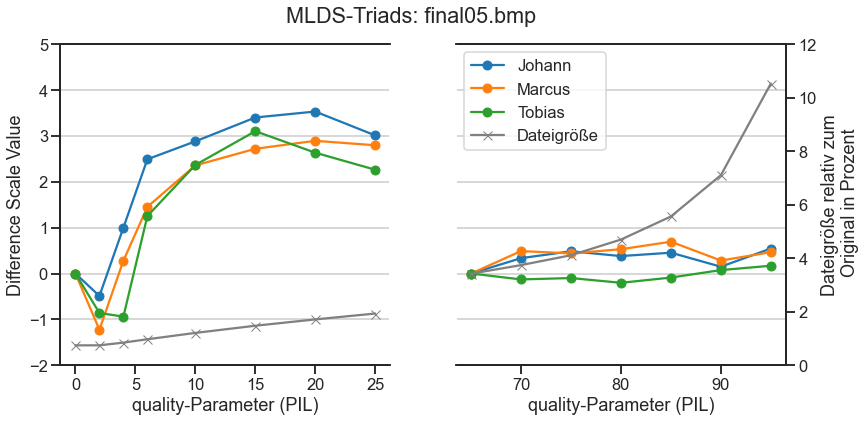

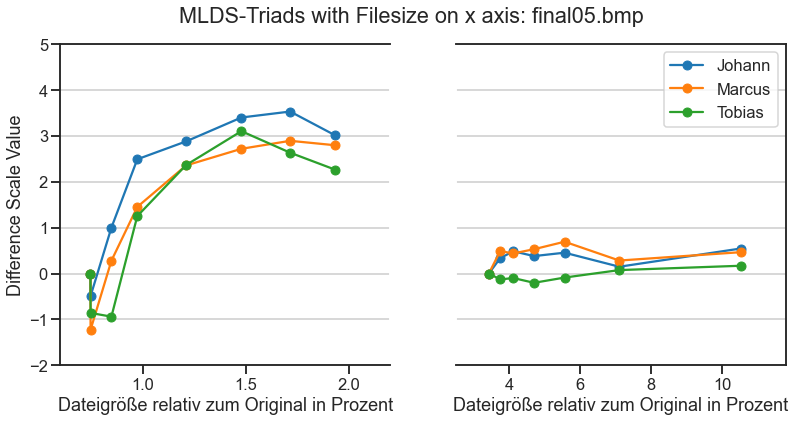

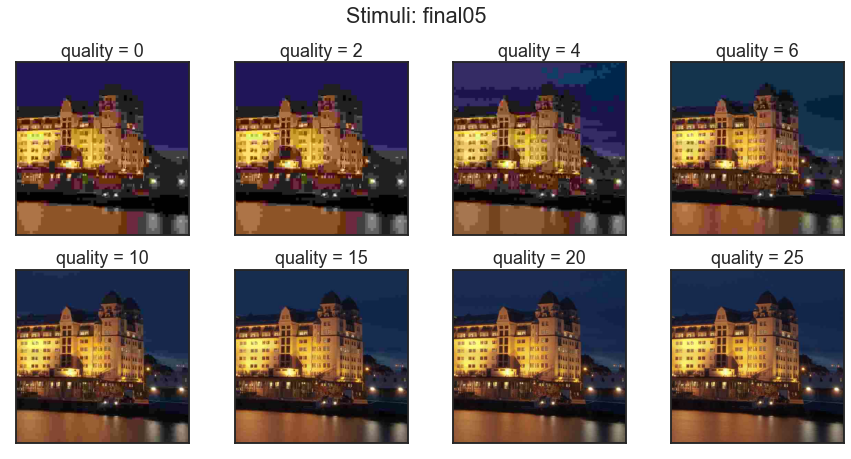

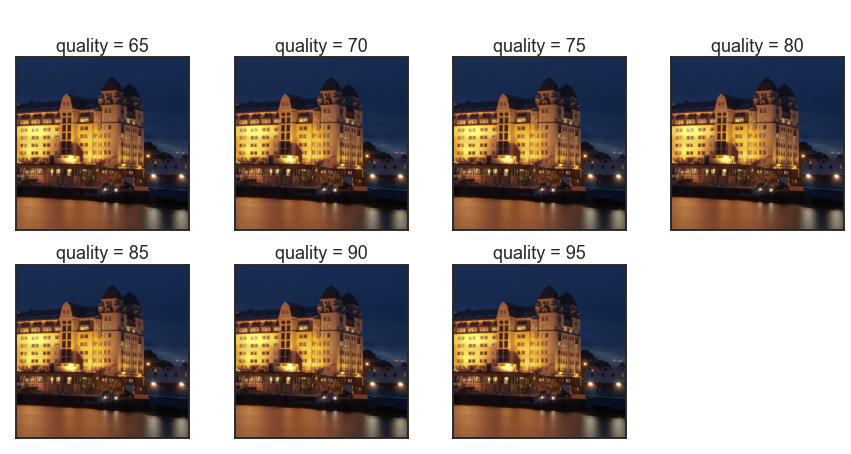

In [22]:
plot_mlds('05')
plot_mlds_filesize('05')
print_stimuli(5, front_parameter)
print_stimuli(5, back_parameter)

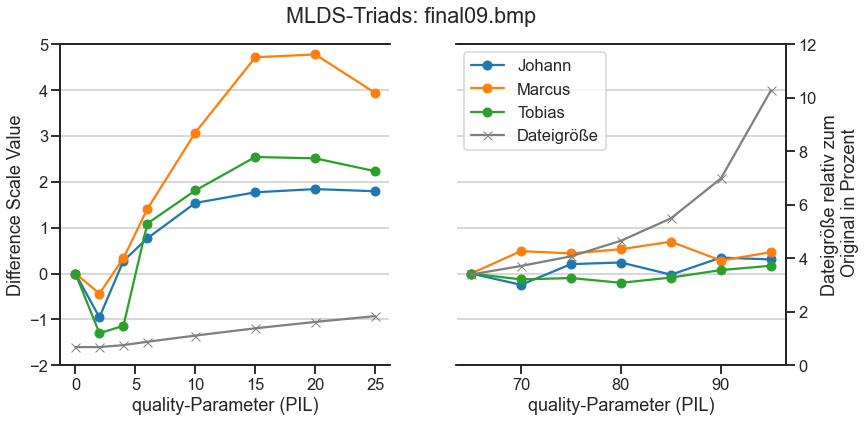

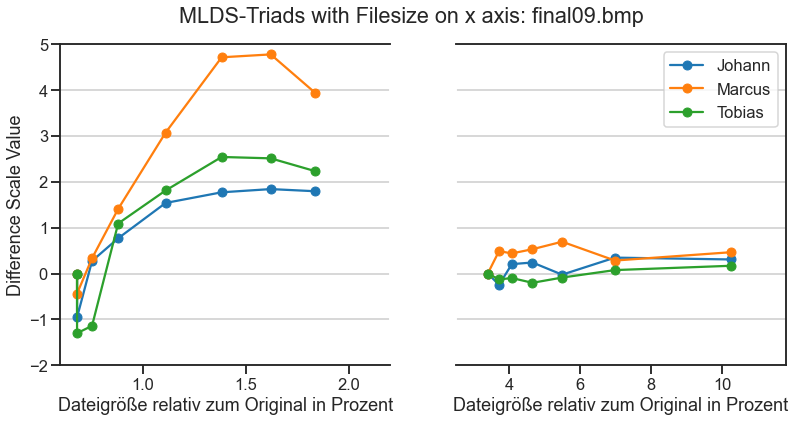

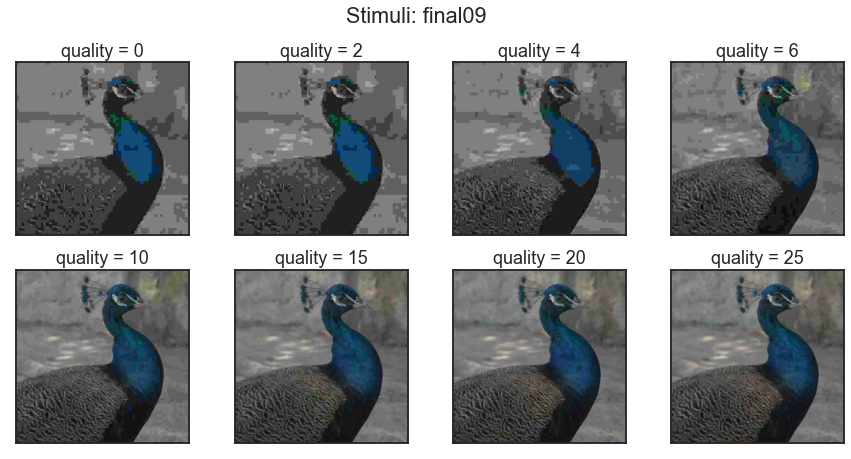

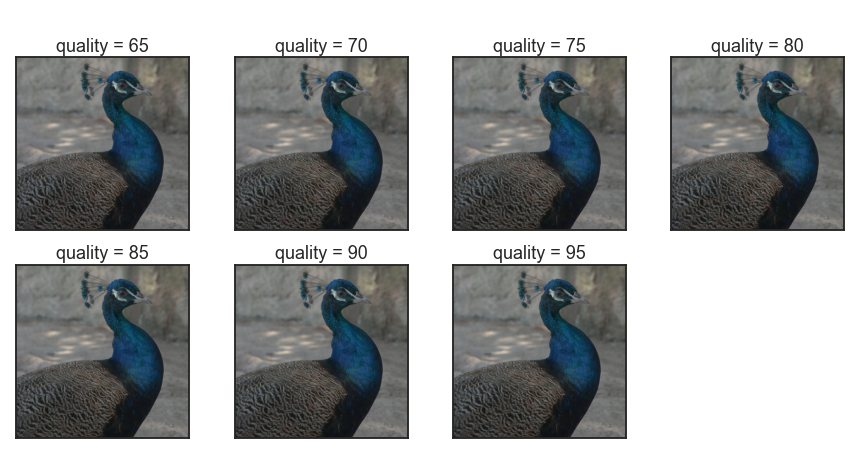

In [23]:
plot_mlds('09')
plot_mlds_filesize('09')
print_stimuli(9, front_parameter)
print_stimuli(9, back_parameter)

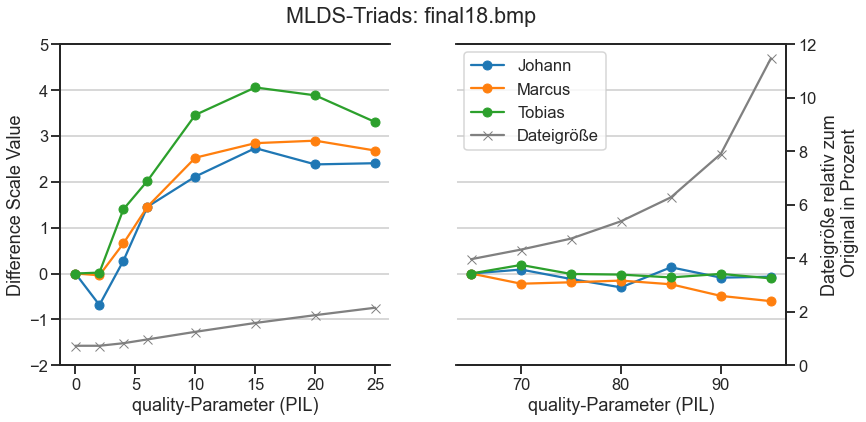

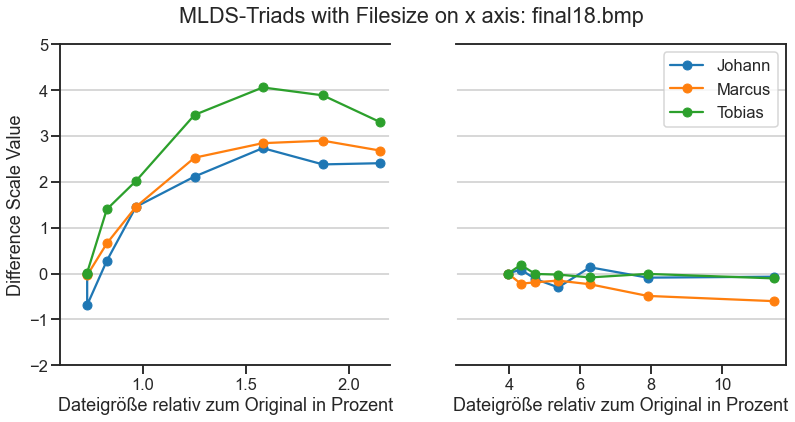

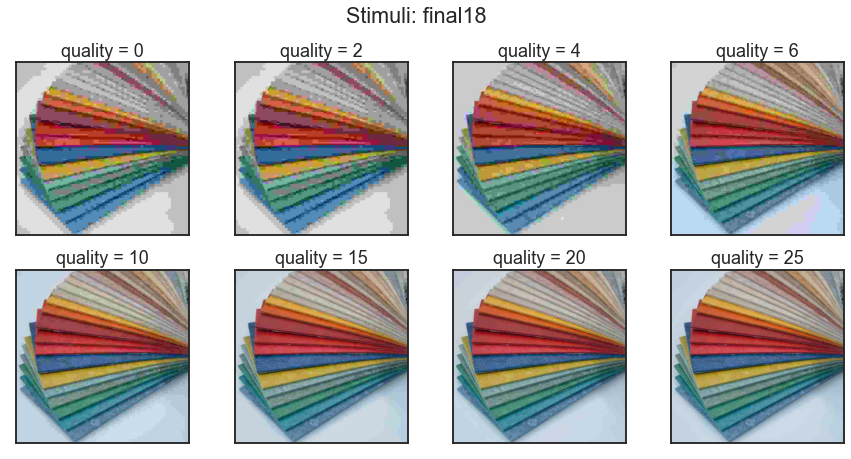

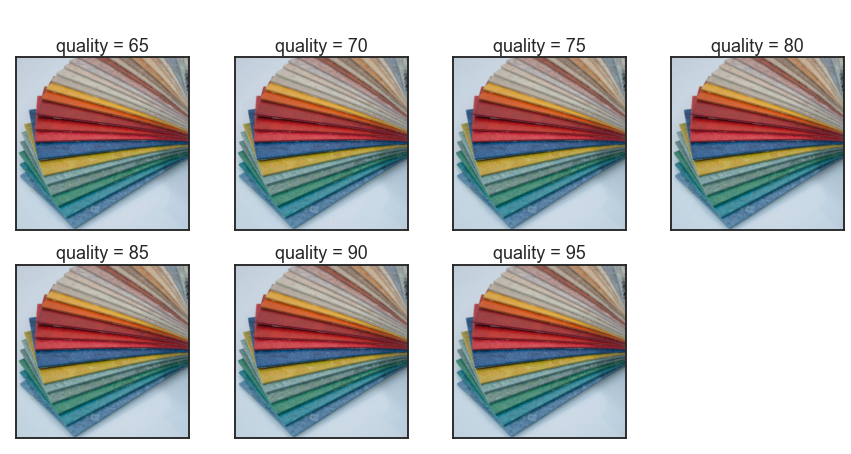

In [24]:
plot_mlds('18')
plot_mlds_filesize('18')
print_stimuli(18, front_parameter)
print_stimuli(18, back_parameter)

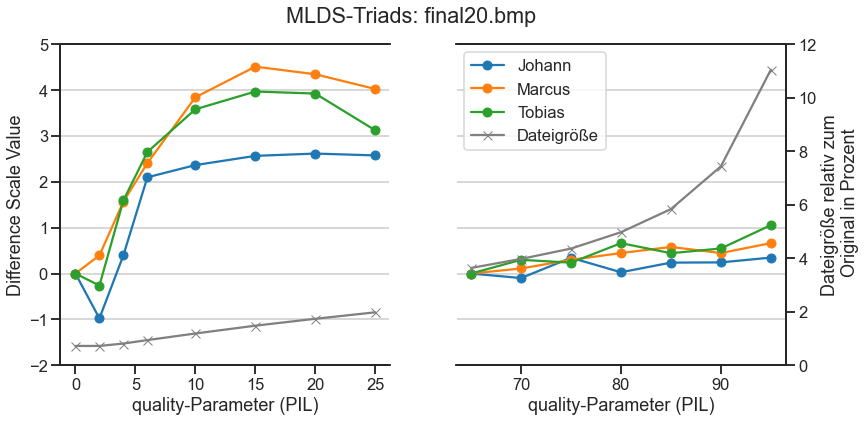

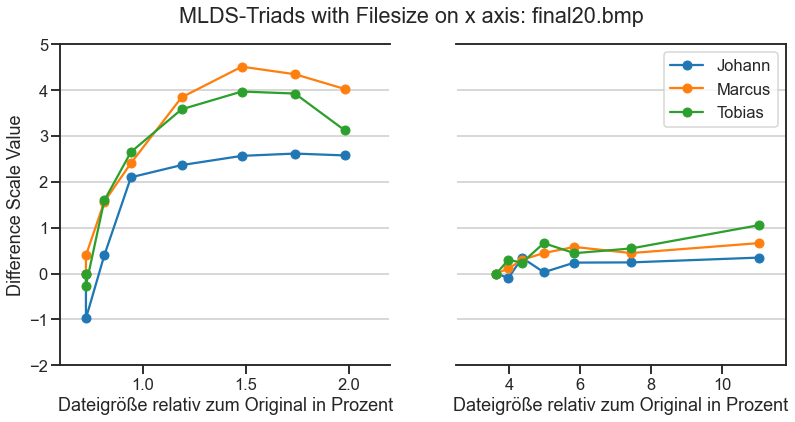

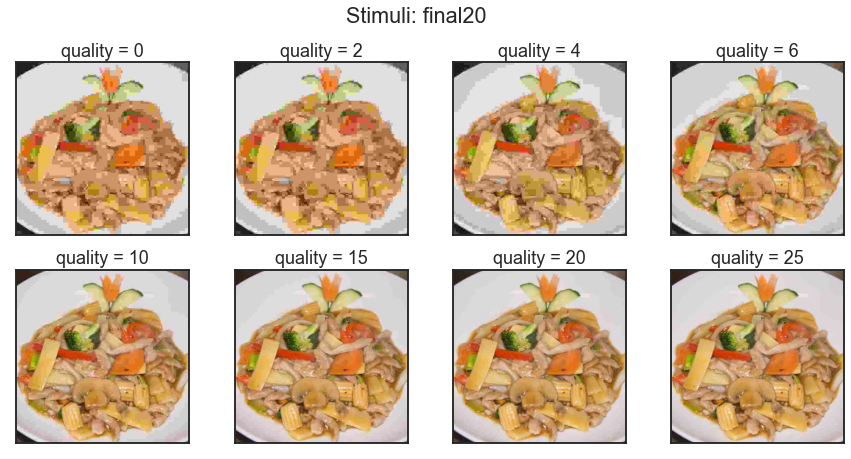

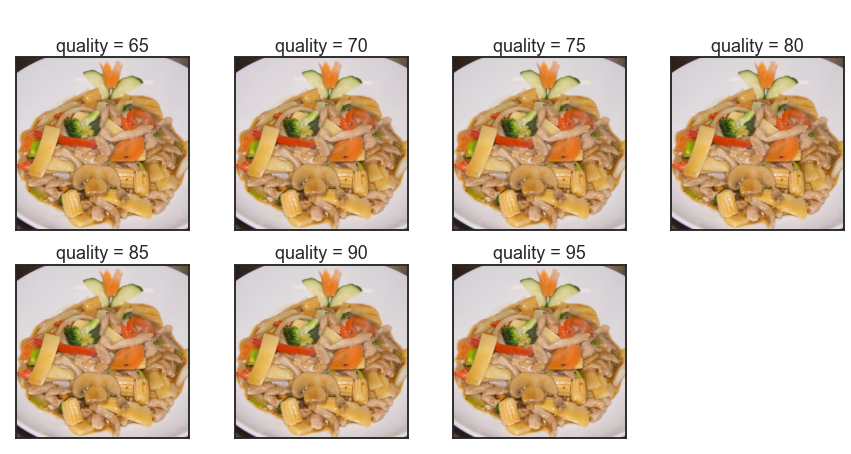

In [25]:
plot_mlds('20')
plot_mlds_filesize('20')
print_stimuli(20, front_parameter)
print_stimuli(20, back_parameter)

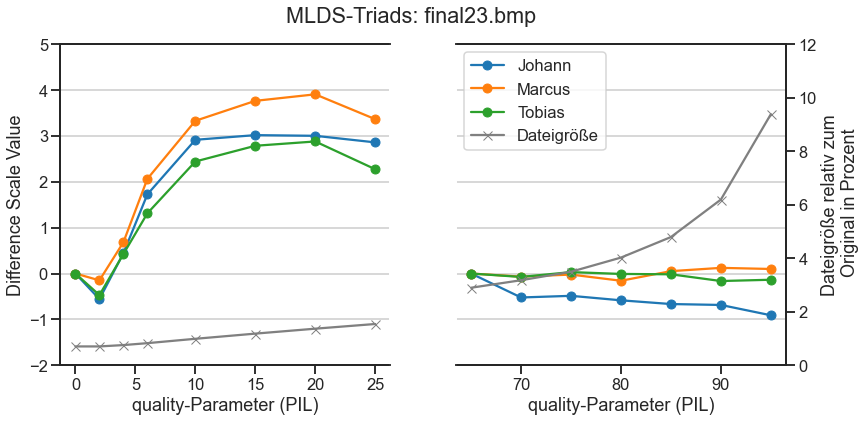

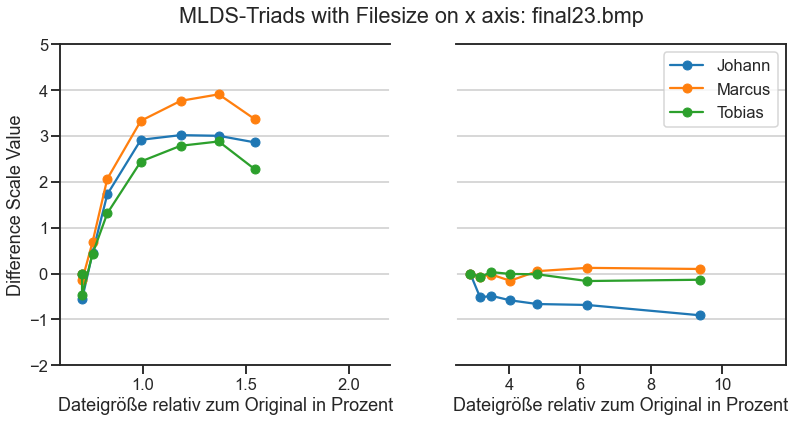

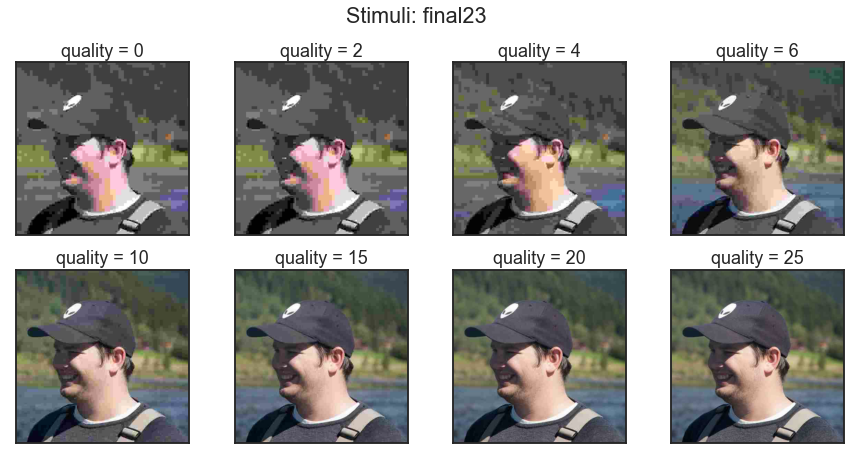

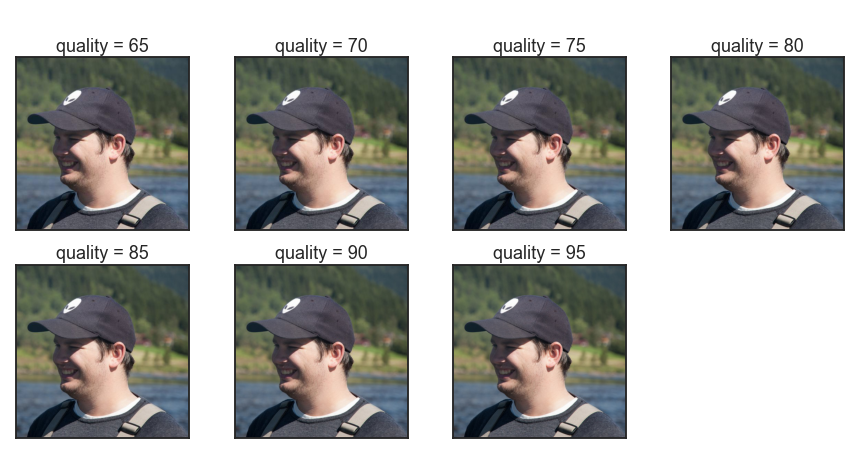

In [26]:
plot_mlds('23')
plot_mlds_filesize('23')
print_stimuli(23, front_parameter)
print_stimuli(23, back_parameter)

# 4. Diskussion

Wir stellen fest, dass im quality-Parameter-Bereich zwischen 2 und 20 die Wahrnehmungsskalen der Testpersonen sehr viel stärker ansteigen als die relative Dateigröße. Danach flachen sie entweder ab oder sinken sogar wieder. Das deutet darauf hin, dass ein Ansteig in der wahrgenommenen Bildqualität wesentlich stärker ist, als die Veränderung in der Dateigröße. Einen wahrnehmbaren Unterschied in der Bildqualität zwischen den Parametern 20 und 25 scheint es dann nicht mehr zu geben.

Im quality-Parameter-Bereich von 65 bis 95 haben die Wahrnehmungsskalen hingegen einen relativ flachen Verlauf. Somit deutet dieser Verlauf darauf hin, dass die Testpersonen keinen spürenbaren Unterschied in der Bildqualität zwischen den Bildern feststellen konnten. Diese Wahrnehmung steht in einem starken Kontrast zum mehr als linearen Anstieg der Dateigröße in diesem quality-Parameter-Bereich.

Im Ergebnis lässt sich feststellen, dass beide Ausgangshypothesen durch die Wahrnehmungsskalen der drei Testpersonen für alle fünf Ausgangsbilder nicht bestätigt wurden:
Im vorderen Skalenbereich der quality-Parameter 0 bis 25 ermittelten wir einen linearen Anstieg der Dateigröße mit steigendem quality-Parameter. Die wahrgenommene Bildqualität der Versuchspersonen stieg jedoch zwischen den Paramtern 2 und 15 bzw. 20 deutlich stärker als linear an.
Im hinteren Skalenbereich mit den quality-Parametern 65 bis 95 veränderte sich die wahrgenommene Bildqualität mit steigendem quality-Parameter kaum bis gar nicht, während die Dateigröße der Stimuli annähernd dem Verlauf einer quadratischen Funktion folgend ansteigt.

### Mögliche Probleme

Die Ergebnisse der Testpersonen haben zwar immer einen ähnlichen Verlauf, trotzdem sind Unterschiede zwischen den Wahrnehmungsskalen erkennenbar. Eine größere Anzahl an Testpersonen hätte ein klareres Bild ergeben können.

Zudem führten die Testpersonen die Versuche nicht unter Laborbedingungen durch. Es ist also nicht ausgeschlossen, dass unterschiedliche Monitoreinstellungen oder andere Faktoren zu leichten Verzerrungen in der Wahrnehmung führten, sodass die Ergebnisse der Versuche nicht vollumfänglich vergleichbar sind.

### Offene Fragen

Das Experiment hat sich auf die quality-Parameter-Bereiche zwischen 0 und 25 sowie 65 und 95 beschränkt. Es wäre interessant zu untersuchen, wie sich die die Wahrnehmungsskalen über den gesamten Bereich der quality-Parameter von 0 bis 95 bei den Versuchspersonen verändern. 

Zudem mussten wir uns aus Zeitgründen auf einzelne Ausgangsbilder beschränken und entschieden uns für Dateien, deren Veränderung der Dateigröße mit zunehmender Komprimierung ähnlich verläuft. Eine weitere untersuchenswerte Frage wäre also, wie das Verhältnis zwischen Dateigröße und Bildqualität bei Stimuli ist, deren Kurvenverlauf sich von den verwendeten Ausgangsbildern stark unterscheidet (beispielsweise final01.bmp und final12.bmp).

## Referenzen

[1] Christophe Charrier et al., "Maximum likelihood difference scaling of image quality in compression-degraded images", *Journal of the Optical Society of America A*, Vol. 24, Issue 11, 2007. https://doi.org/10.1364/JOSAA.24.003418

[2] https://www.ntnu.edu/web/colourlab/software

[3] https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#jpeg

## Rohdaten aus MLDS-Experimenten, aufbereitet in R

In [1]:
# data from mlds triads after processing in r

result_jp_05 = [0.00, -0.49, 1.00, 2.49, 2.88, 3.40, 3.53, 3.01]
result_mb_05 = [0.000, -1.224, 0.279, 1.452, 2.356, 2.718, 2.892, 2.795]
result_tu_05 = [0.000, -0.859, -0.940, 1.252, 2.365, 3.102, 2.633, 2.262]
result_jp_09 = [0.000, -0.955, 0.274, 0.768, 1.538, 1.770, 1.840, 1.793]
result_mb_09 = [0.000, -0.436, 0.333, 1.408, 3.072, 4.712, 4.775, 3.935]
result_tu_09 = [0.00, -1.30, -1.14, 1.09, 1.81, 2.54, 2.51, 2.23]
result_jp_18 = [0.000, -0.686, 0.278, 1.454, 2.113, 2.733, 2.378, 2.404]
result_mb_18 = [0.0000, -0.0379, 0.6557, 1.4550, 2.5238, 2.8409, 2.8951, 2.6796] 
result_tu_18 = [0.0000, 0.0203, 1.3997, 2.0174, 3.4570, 4.0550, 3.8830, 3.3006]
result_jp_20 = [0.000, -0.978, 0.398, 2.097, 2.363, 2.564, 2.614, 2.574]
result_mb_20 = [0.000, 0.395, 1.567, 2.406, 3.840, 4.508, 4.343, 4.022]
result_tu_20 = [0.000, -0.262, 1.593, 2.648, 3.579, 3.966, 3.922, 3.122]
result_jp_23 = [0.000, -0.558, 0.441, 1.725, 2.914, 3.016, 3.001, 2.858]
result_mb_23 = [0.000, -0.149, 0.681, 2.063, 3.328, 3.763, 3.905, 3.364]
result_tu_23 = [0.000, -0.470, 0.425, 1.312, 2.441, 2.784, 2.878, 2.273]

result_jp_05_back = [0.000, 0.335, 0.485, 0.380, 0.454, 0.148, 0.545]
result_mb_05_back = [0.000, 0.489, 0.438, 0.530, 0.693, 0.283, 0.465]
result_tu_05_back = [0.0000, -0.1286, -0.0986, -0.2021, -0.0880, 0.0749, 0.1694]
result_jp_09_back = [0.0000, -0.2463,  0.2047,  0.2402, -0.0247,  0.3465,  0.3064]
result_mb_09_back = [0.000, 0.489, 0.438, 0.530, 0.693, 0.283, 0.465]
result_tu_09_back = [0.0000, -0.1286, -0.0986, -0.2021, -0.0880, 0.0749, 0.1694]
result_jp_18_back = [0.0000, 0.0862, -0.1193, -0.3021, 0.1360, -0.0898, -0.0692]
result_mb_18_back = [0.000, -0.222, -0.191, -0.154, -0.234, -0.488, -0.602]
result_tu_18_back = [0.00000, 0.18686, -0.00947, -0.02328, -0.08471, -0.00807, -0.10590]
result_jp_20_back = [0.0000, -0.0989, 0.3431, 0.0277, 0.2378, 0.2425, 0.3471]
result_mb_20_back = [0.000, 0.110, 0.298, 0.446, 0.579, 0.446, 0.663]
result_tu_20_back = [0.000, 0.299, 0.236, 0.662, 0.443, 0.546, 1.054]
result_jp_23_back = [0.000, -0.522, -0.486, -0.584, -0.665, -0.685, -0.910]
result_mb_23_back = [0.0000, -0.0678, -0.0228, -0.1575, 0.0518, 0.1232, 0.0991]
result_tu_23_back = [0.00000, -0.07468, 0.03101, -0.00906, -0.01701, -0.16356, -0.13558]

# merged in one array per observer for easier processing

mlds_jp = [[result_jp_05, result_jp_05_back],
           [result_jp_09, result_jp_09_back],
           [result_jp_18, result_jp_18_back],
           [result_jp_20, result_jp_20_back],
           [result_jp_23, result_jp_23_back]]

mlds_mb = [[result_mb_05, result_mb_05_back],
           [result_mb_09, result_mb_09_back],
           [result_mb_18, result_mb_18_back],
           [result_mb_20, result_mb_20_back],
           [result_mb_23, result_mb_23_back]]

mlds_tu = [[result_tu_05, result_tu_05_back],
           [result_tu_09, result_tu_09_back],
           [result_tu_18, result_tu_18_back],
           [result_tu_20, result_tu_20_back],
           [result_tu_23, result_tu_23_back]]

## Skripte und Hilfsvariablen

In [2]:
# compress all 23 images with parameter from 0 to 95 and save filesize in an array
# print filesize with absolute and relative parameter

filenumbers_all = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
filesize_absolute_all = []
filesize_relative_all = []

# create an array with compression-parameter in it
compression_rate = []
for i in range(0, 96, 1):
    compression_rate.append(i)

front_parameter = [0,2,4,6,10,15,20,25]
back_parameter = [65,70,75,80,85,90,95]
filenumbers = ['05', '09', '18', '20', '23']

In [3]:
def print_images():
    fig = plt.figure(figsize=(16,22))
    plt.suptitle('Ausgangsdaten: 23 Bilder im BMP-Format', y=.92)
    for i in range(1,24):
        if i < 10:
            number = '0' + str(i)
        else:
            number = str(i)
        img = Image.open('images/originals/final{}.bmp'.format(number))
        fig.add_subplot(6, 4, i)
        plt.title('final{}.bmp'.format(number))
        plt.xticks([]) 
        plt.yticks([])   
        plt.imshow(img)

In [4]:
def createImages(filenumber, qual_start, qual_end, qual_steps):
    pic = Image.open('images/originals/final{}.bmp'.format(filenumber))
    picAsArray = np.array(pic)
    for i in range (qual_start, qual_end + 1, qual_steps):
        Image.fromarray(picAsArray).save('images/final{}_quality_{}.jpg'.format(filenumber, i), 'jpeg', quality=i)

def getFilesize(filenumber, qual_start, qual_end, qual_steps, sizearray_absolute, sizearray_relative):
    sizearray_absolute.append([])
    sizearray_relative.append([])
    for i in range (qual_start, qual_end + 1, qual_steps):
        file = 'images/final{}_quality_{}.jpg'.format(filenumber, i)
        sizearray_absolute[len(sizearray_absolute)-1].append(os.stat(file).st_size)
        sizearray_relative[len(sizearray_relative)-1].append(os.stat(file).st_size/1920054*100)

def deleteImages(filenumber, qual_start, qual_end, qual_steps):
    for i in range (qual_start, qual_end + 1, qual_steps):
        if os.path.exists('images/final{}_quality_{}.jpg'.format(filenumber, i)):
            os.remove('images/final{}_quality_{}.jpg'.format(filenumber, i))

In [5]:
def plotQualitySizeRatioAll():    
    fig, ax1 = plt.subplots(figsize=[10,10])
    ax1.set_ylabel('Dateigröße in Bytes')
    ax1.set_xlabel('quality-Parameter (PIL)')

    for i in range (0, len(filenumbers_all)):
        ax1.plot(compression_rate, filesize_absolute_all[i],label='final{}.bmp'.format(filenumbers_all[i]))
    ax1.tick_params(axis='y')
    ax1.legend(bbox_to_anchor=(1.5, 1))

    ax2 = ax1.twinx()  

    ax2.set_ylabel('Dateigröße relativ zum Original in Prozent')
    for i in range (0, len(filenumbers_all)):#len(filesize_absolute)):
        ax2.plot(compression_rate, filesize_relative_all[i])

    plt.title('Verhältnis zwischen quality-Parameter und Dateigröße')
    ax2.grid(True)
    plt.show()
    #plt.savefig('compression_size_ratio_v2_500px_compressed_65--95.svg', bbox_inches='tight')

In [6]:
def plotQualitySizeRatioAllFocused():        
    fig, ax1 = plt.subplots(figsize=[10,10])
    ax1.set_ylabel('Dateigröße in Bytes')
    ax1.set_xlabel('quality-Parameter (PIL)')

    for i in range (0, len(filenumbers_all)):
        if filenumbers_all[i] in filenumbers:
            ax1.plot(compression_rate, filesize_absolute_all[i],label='final{}.bmp'.format(filenumbers_all[i]))
        else:
            ax1.plot(compression_rate, filesize_absolute_all[i],label='final{}.bmp'.format(filenumbers_all[i]), color='grey',linewidth=.5)
    ax1.tick_params(axis='y')
    ax1.legend(bbox_to_anchor=(1.5, 1))

    ax2 = ax1.twinx()  

    ax2.set_ylabel('Dateigröße relativ zum Original in Prozent')
    for i in range (0, len(filenumbers_all)):
        if filenumbers_all[i] in filenumbers:
            ax2.plot(compression_rate, filesize_relative_all[i])
        else:
            ax2.plot(compression_rate, filesize_relative_all[i],color='grey',linewidth=.5)

    plt.title('Verhältnis zwischen quality-Parameter und Dateigröße')
    ax2.grid(True)

    plt.show()
    #plt.savefig('compression_size_ratio_v2_500px_compressed_65--95.svg', bbox_inches='tight')

In [7]:
def createStimuli(filenumbers, parameter):
    for element in filenumbers:
        pic = Image.open('images/final{}.bmp'.format(element))
        picAsArray = np.array(pic)
        for param in parameter:
            Image.fromarray(picAsArray).save('images/final{}_quality_{}.jpg'.format(element, param), 'jpeg', quality=param)

In [8]:
def plotQualitySizeRatioStimuli():    
    plt_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    fig, ax1 = plt.subplots(figsize=[10,10])
    ax1.set_ylabel('Dateigröße in Bytes')
    ax1.set_xlabel('quality-Parameter (PIL)')

    for i in range (0, len(filenumbers)):
        ax1.plot(parameter[:8], filesize_absolute[i][:8],marker='o',label='final{}.bmp'.format(filenumbers[i]),color=plt_colors[i])
        ax1.plot(parameter[8:], filesize_absolute[i][8:],marker='o',color=plt_colors[i])
    ax1.tick_params(axis='y')
    ax1.legend(bbox_to_anchor=(1.5, 1))

    ax2 = ax1.twinx()  

    ax2.set_ylabel('Dateigröße relativ zum Original in Prozent')
    for i in range (0, len(filenumbers)):
        ax2.plot(parameter[:8], filesize_relative[i][:8],marker='o',label='final{}.bmp'.format(filenumbers[i]),color=plt_colors[i])
        ax2.plot(parameter[8:], filesize_relative[i][8:],marker='o',color=plt_colors[i])

    plt.title('Verhältnis zwischen quality-Parameter und Dateigröße')
    ax2.grid(True)

    plt.show()
    #plt.savefig('compression_size_ratio_v2_500px_compressed_65--95.svg', bbox_inches='tight')

In [9]:
def plot_mlds(filenumber):
    fig=plt.figure(figsize=(13,13))
    fig.suptitle('MLDS-Triads: final{}.bmp'.format(filenumber), y=0.92)
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax3 = ax1.twinx()
    ax4 = ax2.twinx()
    ax1.set_ylabel('Difference Scale Value')
    ax1.set_xlabel('quality-Parameter (PIL)')
    ax2.set_xlabel('quality-Parameter (PIL)')
    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    ax4.set_ylabel('Dateigröße relativ zum\n Original in Prozent')
    p1, = ax1.plot(front_parameter, mlds_jp[filenumbers.index(filenumber)][0], marker='o', label="Johann")
    p2, = ax1.plot(front_parameter, mlds_mb[filenumbers.index(filenumber)][0], marker='o', label="Marcus")
    p3, = ax1.plot(front_parameter, mlds_tu[filenumbers.index(filenumber)][0], marker='o', label="Tobias")
    p4, = ax3.plot(front_parameter, filesize_relative[filenumbers.index(filenumber)][0:8], marker='x', label="Dateigröße", color="grey")
    ax1.grid(axis='y')
    ax1.set_ylim([-2,5])
    ax3.set_ylim([0,12])
    ax2.plot(back_parameter, mlds_jp[filenumbers.index(filenumber)][1], marker='o', label="Johann")
    ax2.plot(back_parameter, mlds_mb[filenumbers.index(filenumber)][1], marker='o', label="Marcus")
    ax2.plot(back_parameter, mlds_tu[filenumbers.index(filenumber)][1], marker='o', label="Tobias")
    ax4.plot(back_parameter, filesize_relative[filenumbers.index(filenumber)][8:], marker='x', label="Dateigröße", color="grey")
    ax2.grid(axis='y')
    ax2.set_ylim([-2,5])
    ax4.set_ylim([0,12])
    ax1.spines['right'].set_color(None) # hide inner y axis
    ax3.spines['right'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax4.spines['left'].set_color(None)
    ax3.tick_params(axis='y', colors='white') # hide ticks on y axis
    ax2.tick_params(axis='y', colors='white')
    lines = [p1, p2, p3, p4]
    plt.legend(lines, [l.get_label() for l in lines])
    plt.show()    

In [10]:
def plot_mlds_filesize(filenumber):
    fig=plt.figure(figsize=(13,13))
    fig.suptitle('MLDS-Triads with Filesize on x axis: final{}.bmp'.format(filenumber), y=0.92)
    ax1 = plt.subplot(221)
    ax2 = plt.subplot(222)
    ax1.set_ylabel('Difference Scale Value')
    ax1.set_xlabel('Dateigröße relativ zum Original in Prozent')
    ax2.set_xlabel('Dateigröße relativ zum Original in Prozent')
    ax2.set_yticklabels([])
    p1, = ax1.plot(filesize_relative[filenumbers.index(filenumber)][0:8], mlds_jp[filenumbers.index(filenumber)][0], marker='o', label="Johann")
    p2, = ax1.plot(filesize_relative[filenumbers.index(filenumber)][0:8], mlds_mb[filenumbers.index(filenumber)][0], marker='o', label="Marcus")
    p3, = ax1.plot(filesize_relative[filenumbers.index(filenumber)][0:8], mlds_tu[filenumbers.index(filenumber)][0], marker='o', label="Tobias")
    ax1.grid(axis='y')
    ax1.set_xlim([.6,2.2])
    ax2.set_xlim([2.5,11.8])
    ax2.plot(filesize_relative[filenumbers.index(filenumber)][8:], mlds_jp[filenumbers.index(filenumber)][1], marker='o', label="Johann")
    ax2.plot(filesize_relative[filenumbers.index(filenumber)][8:], mlds_mb[filenumbers.index(filenumber)][1], marker='o', label="Marcus")
    ax2.plot(filesize_relative[filenumbers.index(filenumber)][8:], mlds_tu[filenumbers.index(filenumber)][1], marker='o', label="Tobias")
    ax2.grid(axis='y')
    ax1.set_ylim([-2,5])
    ax2.set_ylim([-2,5])
    ax1.spines['right'].set_color(None) # hide inner y axis
    ax2.spines['left'].set_color(None)
    ax2.tick_params(axis='y', colors='white') # hide ticks on y axis
    lines = [p1, p2, p3]
    plt.legend(lines, [l.get_label() for l in lines])
    plt.show()    

In [11]:
def print_stimuli(number, parameter):
    if number < 10:
        number = '0' + str(number)
    fig = plt.figure(figsize=(15,7))
    if parameter[0] == 0:
        plt.suptitle('Stimuli: final{}'.format(number), y=0.99)
    else: 
        plt.suptitle('\n')
    for i in range(0,len(parameter)):
        img = Image.open('images/final{}_quality_{}.jpg'.format(number, parameter[i]))
        fig.add_subplot(2, 4, i + 1)
        plt.title('quality = {}'.format(parameter[i]))
        plt.xticks([]) 
        plt.yticks([])   
        plt.imshow(img)